In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('Demo data.CSV')
X = data.iloc[:, 1:2].values
Y = data.iloc[:, 2].values

In [9]:
# 对数据进行标准化
X = np.reshape(X, (-1, 1)) # 将X重新塑形为一列，行数有numpy根据剩下的维度计算所得
Y = np.reshape(Y, (-1, 1))

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [10]:
# 使用SVR模型对数据进行拟合
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X, Y)

D:\softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [11]:
# 将预测得到的值转化为正常值
Y_pred = regressor.predict(sc_X.transform(np.array([[5.5]])))
Y_pred = sc_Y.inverse_transform(Y_pred)

Text(0, 0.5, 'Salary')

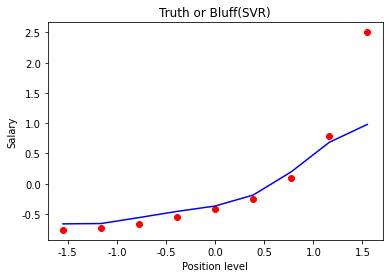

In [12]:
plt.scatter(X, Y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')